### Class practice on 23/07/2024 - Advanced python programming
##### Prajwal Luitel (C0927658)

### Linear Regression using python

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [3]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


housing = fetch_california_housing()
print(type(housing))
print(housing.target)

<class 'sklearn.utils._bunch.Bunch'>
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [4]:
data = housing.data[:,0:2]
target = housing.target

In [5]:
df = pd.DataFrame(data, columns=["Feature0", "Feature1"])
df["target"]=target
print(df.shape)
df.head(1)

(20640, 3)


,Feature0,Feature1,target
0,8.3252,41.0,4.526


In [6]:
df.head()

,Feature0,Feature1,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature0  20640 non-null  float64
 1   Feature1  20640 non-null  float64
 2   target    20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [8]:
df.describe()

,Feature0,Feature1,target
count,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,2.068558
std,1.899822,12.585558,1.153956
min,0.499900,1.000000,0.149990
25%,2.563400,18.000000,1.196000
50%,3.534800,29.000000,1.797000
75%,4.743250,37.000000,2.647250
max,15.000100,52.000000,5.000010


<Axes: xlabel='Feature0', ylabel='target'>

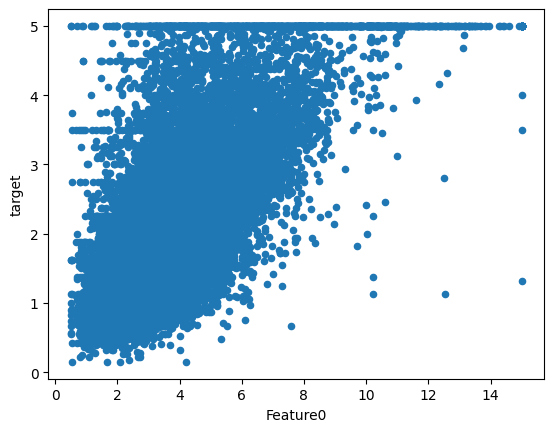

In [10]:
df[["Feature0", "target"]].plot(kind="scatter", x="Feature0", y="target")

<Axes: xlabel='Feature1', ylabel='target'>

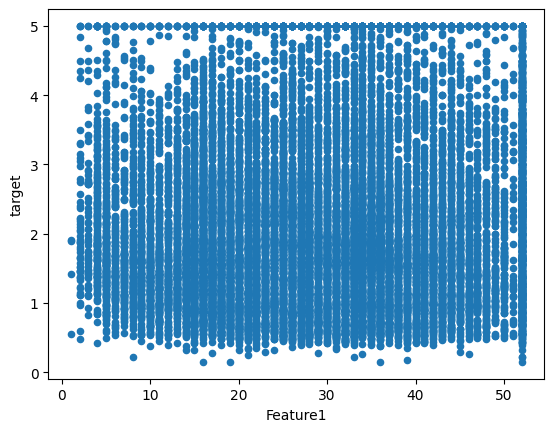

In [11]:
df.plot(kind="scatter", x="Feature1", y="target")


<Axes: >

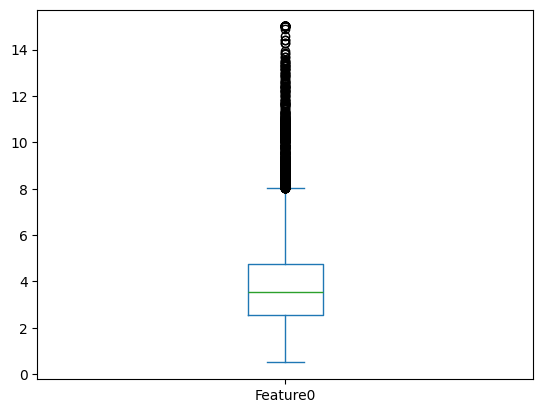

In [12]:
df["Feature0"].plot(kind="box")

<Axes: >

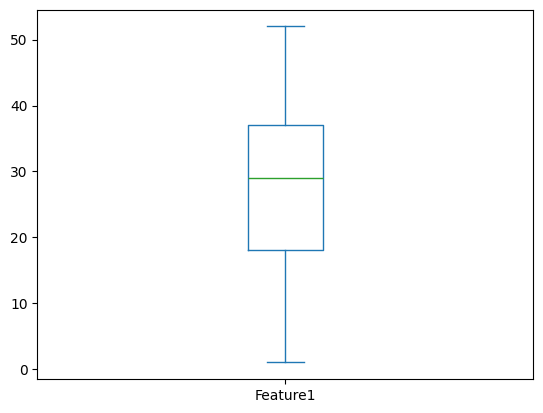

In [13]:
df["Feature1"].plot(kind="box")


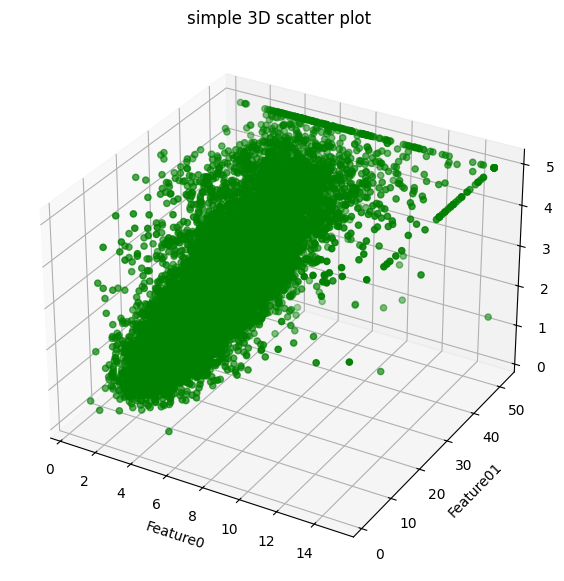

In [16]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(df["Feature0"], df["Feature1"], df["target"], color = "green")
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature01")
ax.set_zlabel("target")
plt.title("simple 3D scatter plot")

plt.show()


In [14]:
df.corr('pearson')

,Feature0,Feature1,target
Feature0,1.000000,-0.119034,0.688075
Feature1,-0.119034,1.000000,0.105623
target,0.688075,0.105623,1.000000


In [18]:
x = df[["Feature0","Feature1"]]
y = df[["target"]]
print(f"X shape: {x.shape}")
print(f"Y shape: {y.shape}")


X shape: (20640, 2)
Y shape: (20640, 1)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"Y train shape: {y_train.shape}")
print(f"Y test shape: {y_test.shape}")

X train shape: (14448, 2)
X test shape: (6192, 2)
Y train shape: (14448, 1)
Y test shape: (6192, 1)


### Simple linear regression

In [20]:
regression = LinearRegression()
model =regression.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [21]:
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 train: {r2_train.round(4)}")
r2_test = r2_score(y_test, y_pred_test)
print(f"r2 test: {r2_test.round(4)}")


r2 train: 0.5093
r2 test: 0.5087


#### RMSE

In [27]:
RMSE_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE_train: {RMSE_train}")

RMSE_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE_test: {RMSE_test}")

RMSE_train: 0.8108139243661333
RMSE_test: 0.8029929600186396


In [28]:
model.intercept_

array([-0.10299578])

In [29]:
model.coef_

array([[0.43176259, 0.01743944]])

### Interaction Features

In [30]:
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(features_interaction, y, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (14448, 3)
X_test shape: (6192, 3)
Y_train shape: (14448, 1)
Y_test shape: (6192, 1)


In [31]:
X_train[1:4]

array([[  2.8631,  20.    ,  57.262 ],
       [  4.2026,  24.    , 100.8624],
       [  3.1094,  14.    ,  43.5316]])

In [32]:
regression = LinearRegression()
model = regression.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 train: {r2_train.round(4)}")
r2_test = r2_score(y_test, y_pred_test)
print(f"r2 test: {r2_test.round(4)}")

r2 train: 0.5098
r2 test: 0.5095


### Polynomial Regression

In [33]:
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(x)
features_polynomial[0]

array([8.32520000e+00, 4.10000000e+01, 6.93089550e+01, 3.41333200e+02,
       1.68100000e+03, 5.77010912e+02, 2.84166716e+03, 1.39946612e+04,
       6.89210000e+04])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features_polynomial, y, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (14448, 9)
X_test shape: (6192, 9)
Y_train shape: (14448, 1)
Y_test shape: (6192, 1)


In [35]:
regression = LinearRegression()
model = regression.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 train: {r2_train.round(4)}")
r2_test = r2_score(y_test, y_pred_test)
print(f"r2 test: {r2_test.round(4)}")

r2 train: 0.54
r2 test: 0.5359


## Exploring overfitting with polynomial regression

In [42]:
polynomial = PolynomialFeatures(degree=11, include_bias=False)
features_polynomial = polynomial.fit_transform(x)
features_polynomial[0]

array([8.32520000e+00, 4.10000000e+01, 6.93089550e+01, 3.41333200e+02,
       1.68100000e+03, 5.77010912e+02, 2.84166716e+03, 1.39946612e+04,
       6.89210000e+04, 4.80373125e+03, 2.36574474e+04, 1.16508353e+05,
       5.73781109e+05, 2.82576100e+06, 3.99920234e+04, 1.96952981e+05,
       9.69955344e+05, 4.77684249e+06, 2.35250255e+07, 1.15856201e+08,
       3.32941593e+05, 1.63967296e+06, 8.07507223e+06, 3.97681691e+07,
       1.95850542e+08, 9.64526045e+08, 4.75010424e+09, 2.77180535e+06,
       1.36506053e+07, 6.72265913e+07, 3.31077961e+08, 1.63049493e+09,
       8.02987223e+09, 3.95455678e+10, 1.94754274e+11, 2.30758339e+07,
       1.13644019e+08, 5.59674818e+08, 2.75629024e+09, 1.35741964e+10,
       6.68502923e+10, 3.29224761e+11, 1.62136828e+12, 7.98492523e+12,
       1.92110932e+08, 9.46109190e+08, 4.65940480e+09, 2.29466675e+10,
       1.13007900e+11, 5.56542053e+11, 2.74086198e+12, 1.34982152e+13,
       6.64760995e+13, 3.27381934e+14, 1.59936193e+09, 7.87654823e+09,
      

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features_polynomial, y, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (14448, 77)
X_test shape: (6192, 77)
Y_train shape: (14448, 1)
Y_test shape: (6192, 1)


In [44]:
regression = LinearRegression()
model = regression.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 train: {r2_train.round(4)}")
r2_test = r2_score(y_test, y_pred_test)
print(f"r2 test: {r2_test.round(4)}")

r2 train: 0.1924
r2 test: 0.0464


### Regularization

In [45]:
feature = housing.data[:,:]
target = housing.target

df = pd.DataFrame(feature, columns=["Feature0", "Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7"])

df['target'] = target

X = df.loc[:, df.columns != 'target']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"Y_test shape: {y_test.shape}")


X_train shape: (14448, 8)
X_test shape: (6192, 8)
Y_train shape: (14448,)
Y_test shape: (6192,)


In [46]:
regression = LinearRegression()
model = regression.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 train: {r2_train.round(4)}")
r2_test = r2_score(y_test, y_pred_test)
print(f"r2 test: {r2_test.round(4)}")

r2 train: 0.6093
r2 test: 0.5958


In [58]:
regression = Lasso(alpha=0.008)
model = regression.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 train: {r2_train.round(4)}")
r2_test = r2_score(y_test, y_pred_test)
print(f"r2 test: {r2_test.round(4)}")

r2 train: 0.6067
r2 test: 0.5999


## Ridge regularization

In [72]:
regression = Ridge(alpha=1)
model = regression.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 train: {r2_train.round(4)}")
r2_test = r2_score(y_test, y_pred_test)
print(f"r2 test: {r2_test.round(4)}")

r2 train: 0.6093
r2 test: 0.5958


## Elastic Net Regulariztion

In [85]:
from sklearn.linear_model import ElasticNet

regression = ElasticNet(alpha=0.001)
model = regression.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 train: {r2_train.round(4)}")
r2_test = r2_score(y_test, y_pred_test)
print(f"r2 test: {r2_test.round(4)}")

r2 train: 0.6093
r2 test: 0.5966
